https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

np.random.seed(100)

import warnings
warnings.filterwarnings('ignore')

In [2]:
file = 'data.csv'
df = pd.read_csv(file, sep = ';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
df.rename(columns = {'Daytime/evening attendance\t': 'Daytime/evening attendance'}, inplace = True)

In [4]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [6]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [7]:
df.columns = df.columns.str.replace("'", "")
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mothers qualification', 'Fathers qualification', 'Mothers occupation',
       'Fathers occupation', 'Admission grade', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)'

### Target Variable

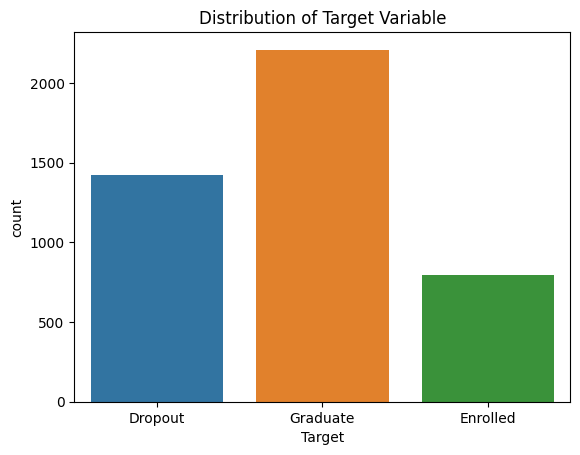

In [8]:
sns.countplot(x = df['Target'], hue = df['Target'])
plt.title('Distribution of Target Variable')
plt.show()

In [60]:
df['Target'].value_counts()

Target
1    2209
0    1421
2     794
Name: count, dtype: int64

#### Visualizing Continuous Variables

In [9]:
continuous_var = df.select_dtypes(include = ['float64']).columns.tolist()
continuous_var

['Previous qualification (grade)',
 'Admission grade',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (grade)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

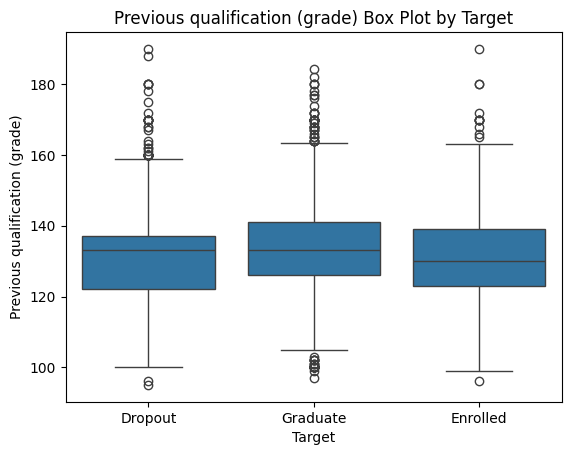

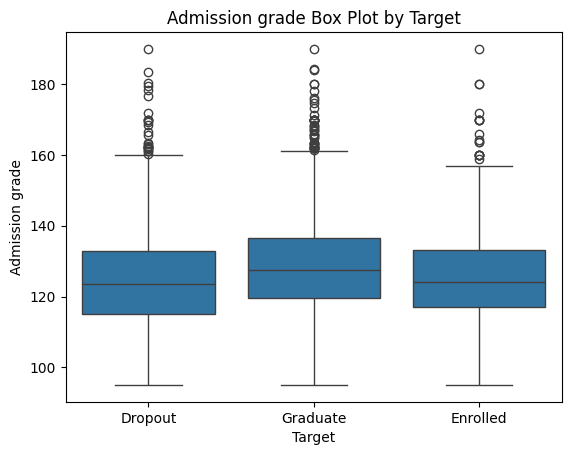

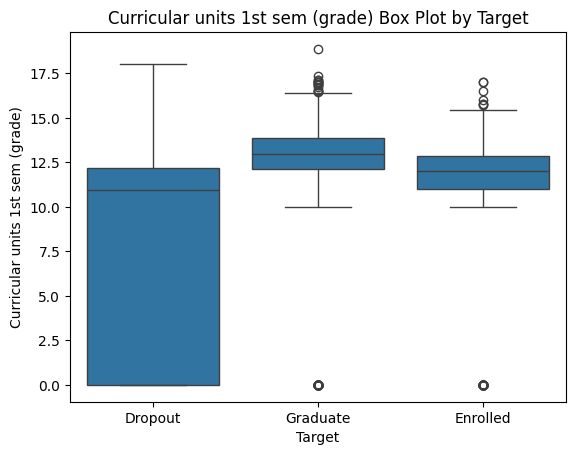

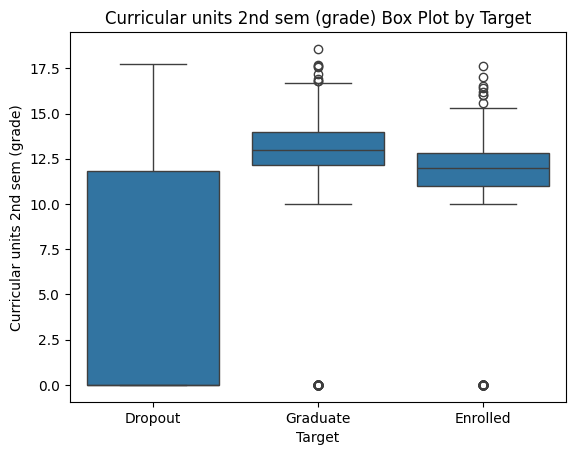

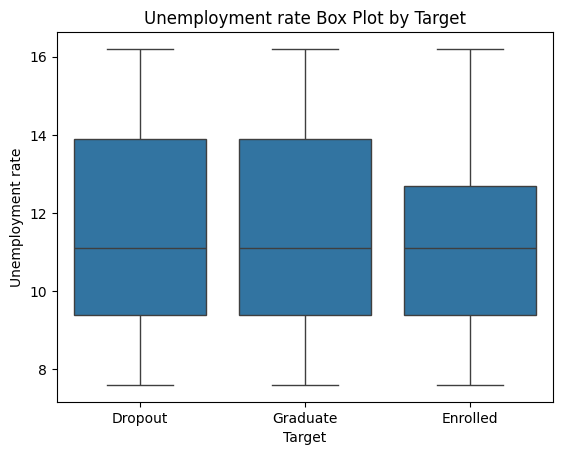

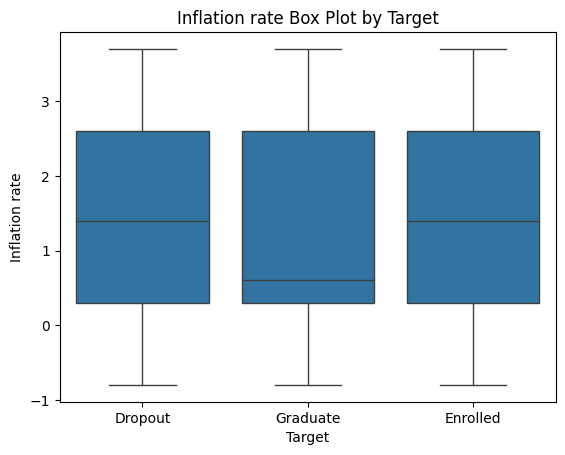

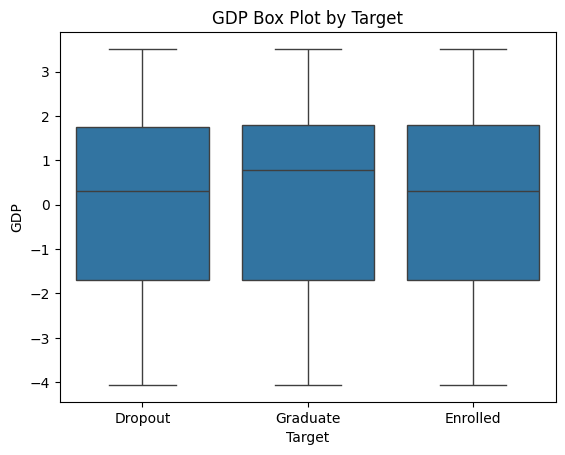

In [10]:
for v in continuous_var:
    sns.boxplot(x = 'Target', y = v, data = df)
    plt.title(f'{v} Box Plot by Target')
    plt.show()

#### Visualizing Categorical Vars

In [11]:
categorical_var = df.select_dtypes(include = ['int64']).columns.tolist()
categorical_var

['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Nacionality',
 'Mothers qualification',
 'Fathers qualification',
 'Mothers occupation',
 'Fathers occupation',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (without evaluations)']

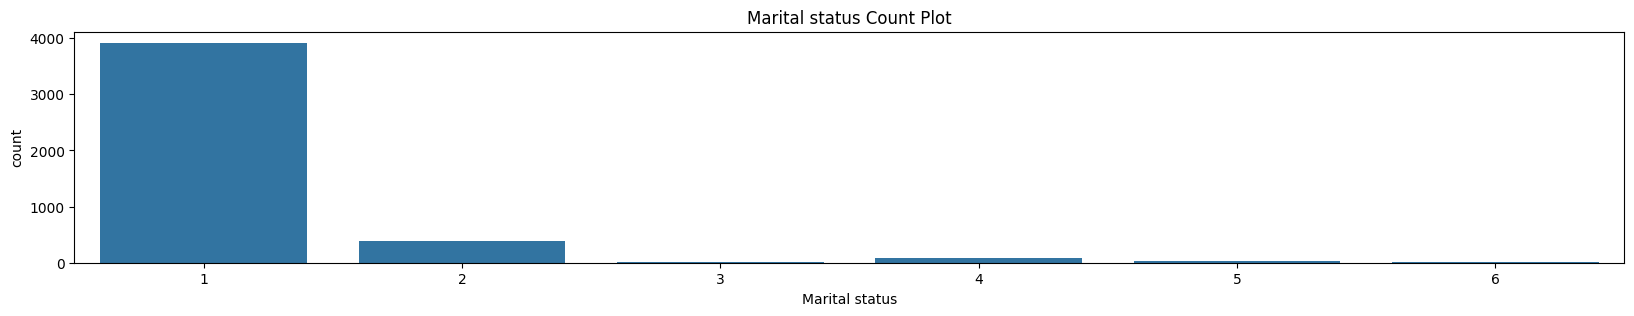

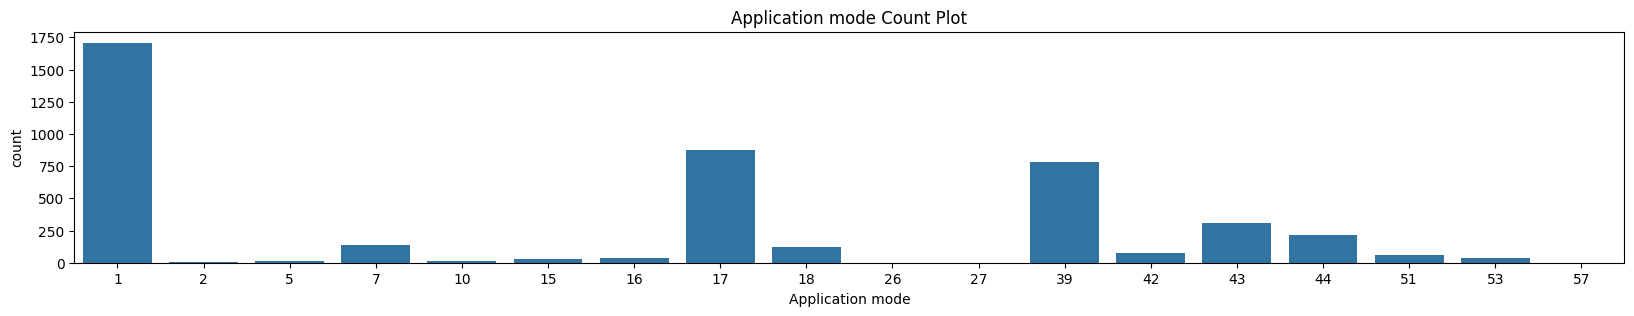

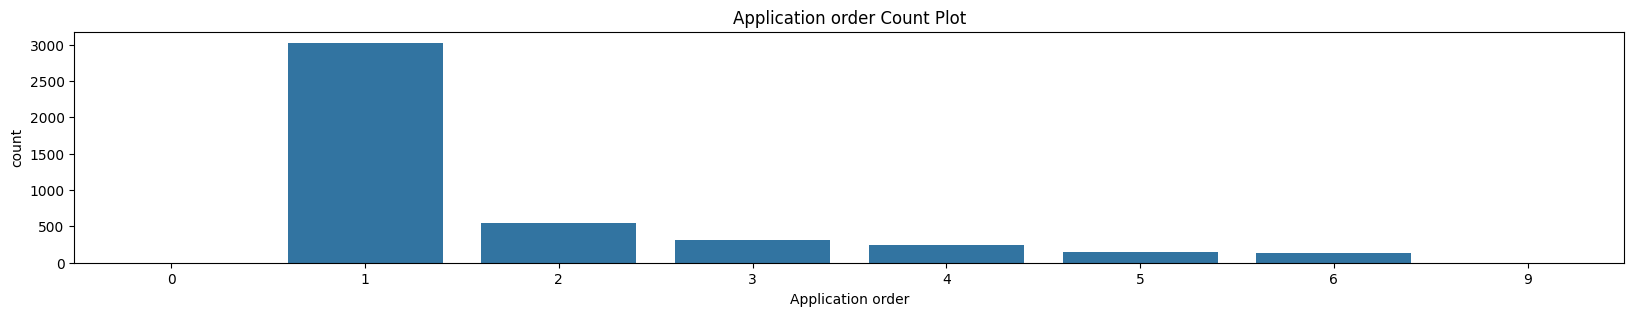

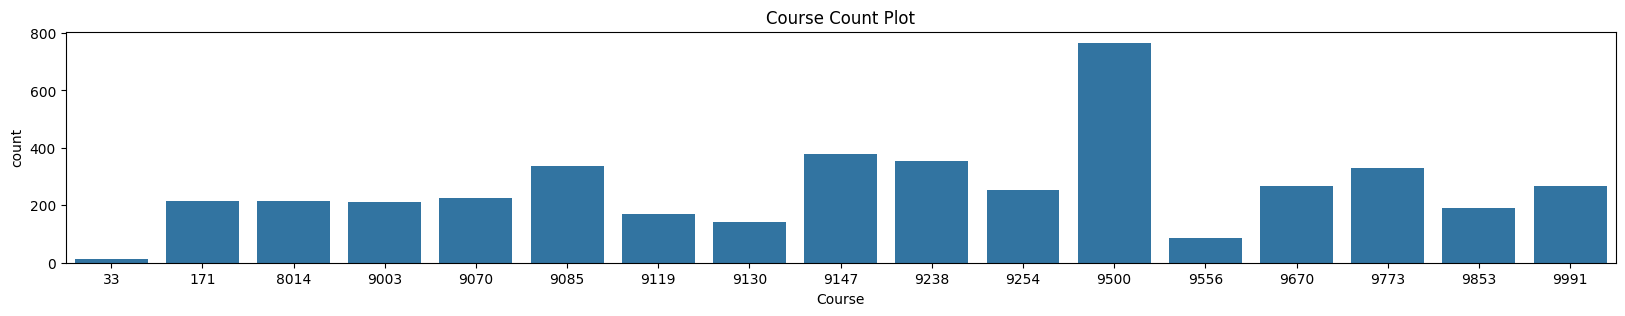

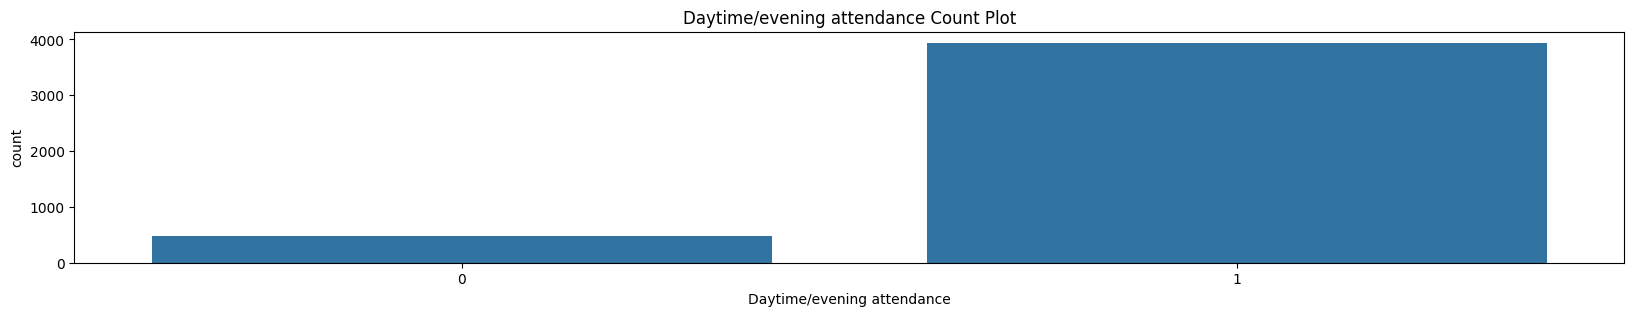

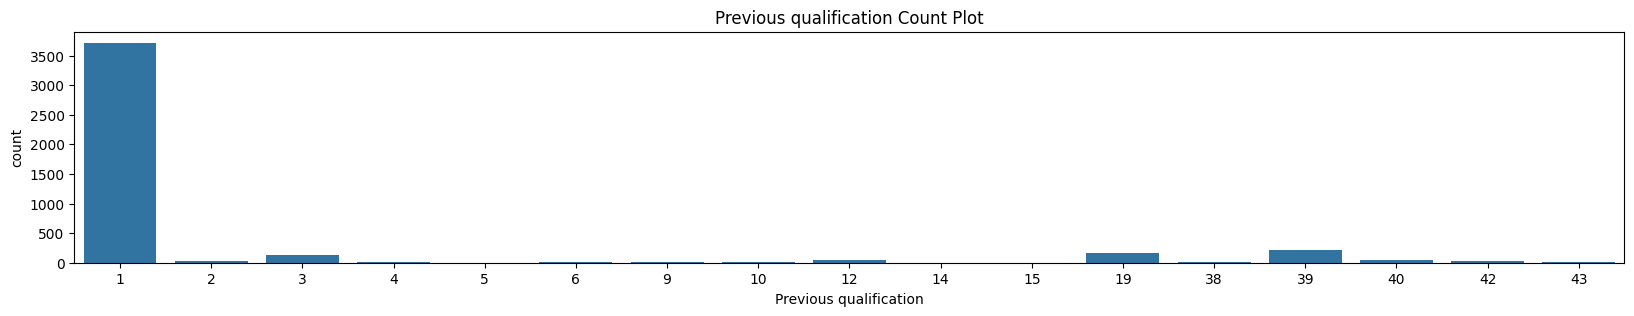

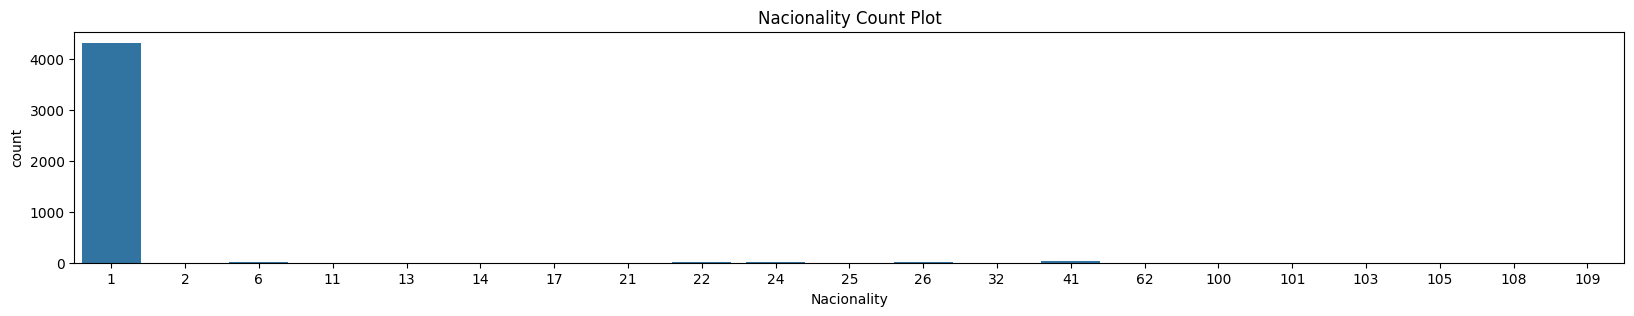

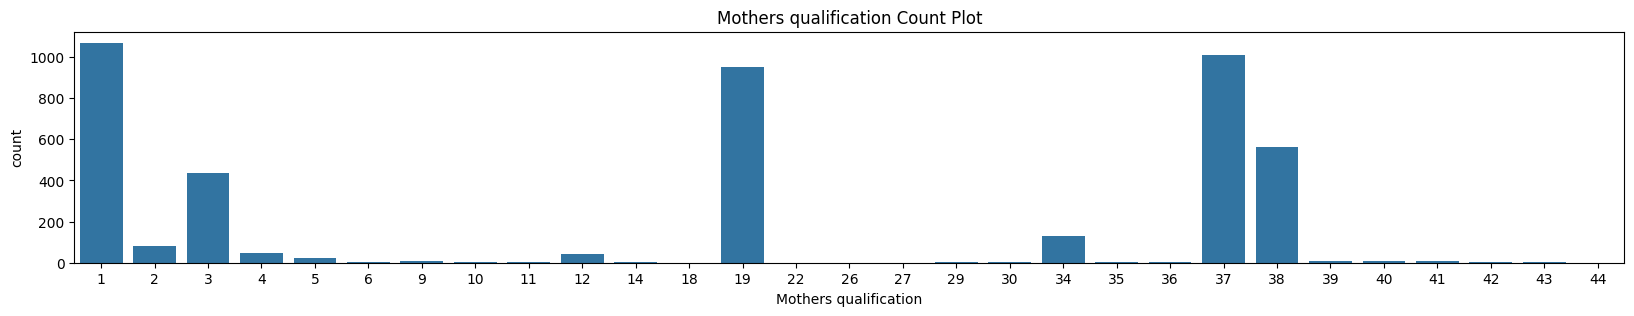

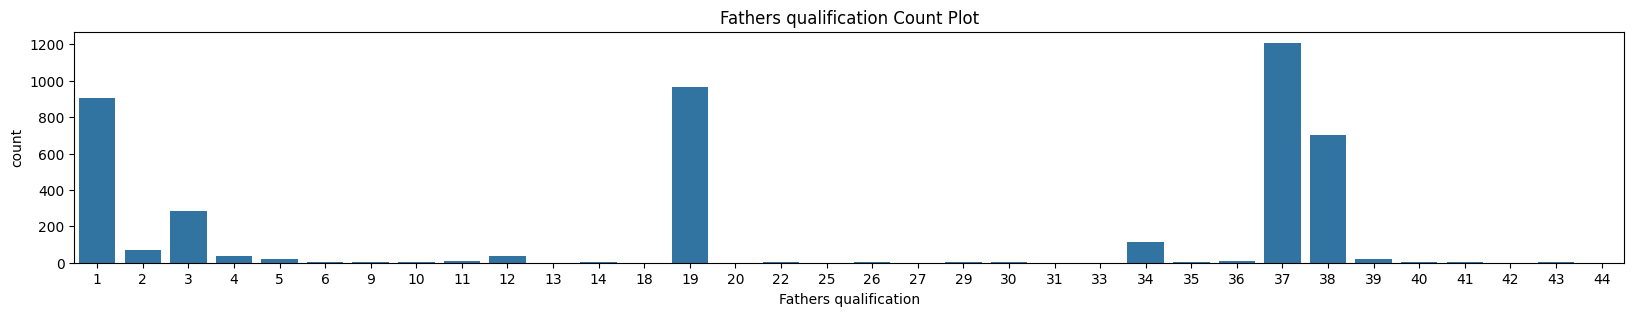

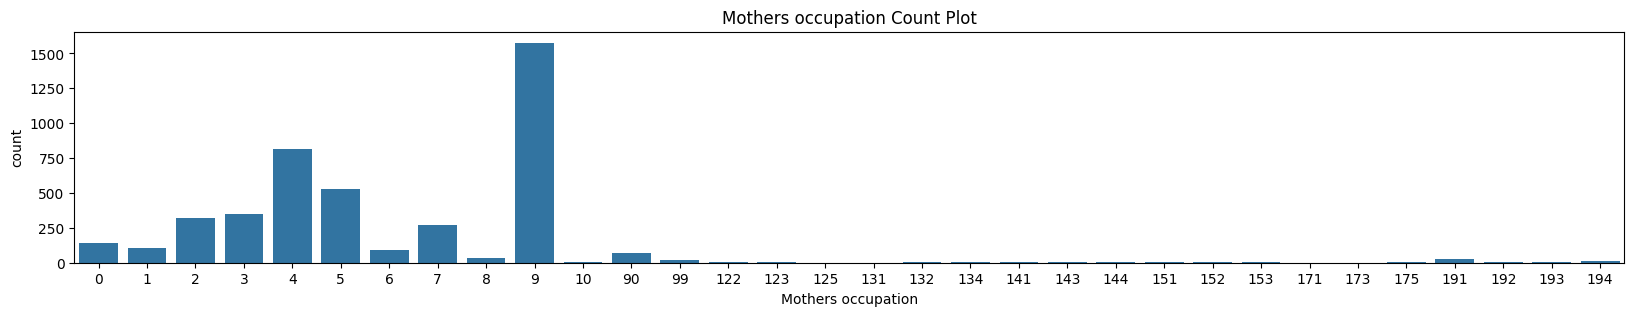

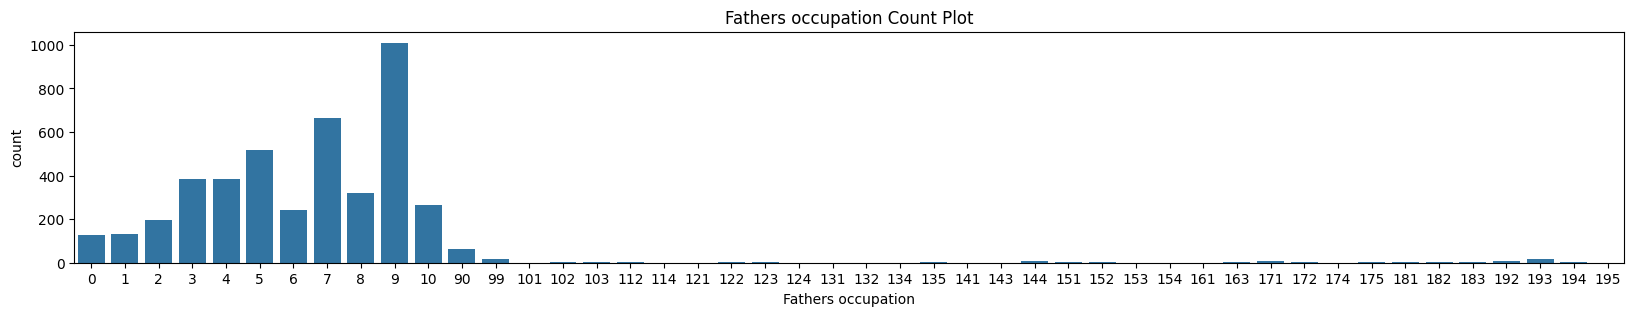

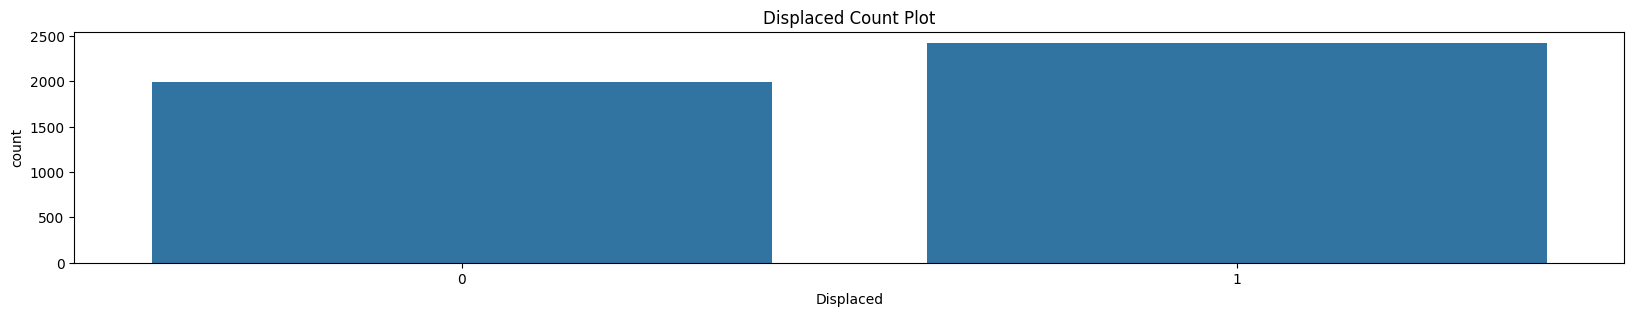

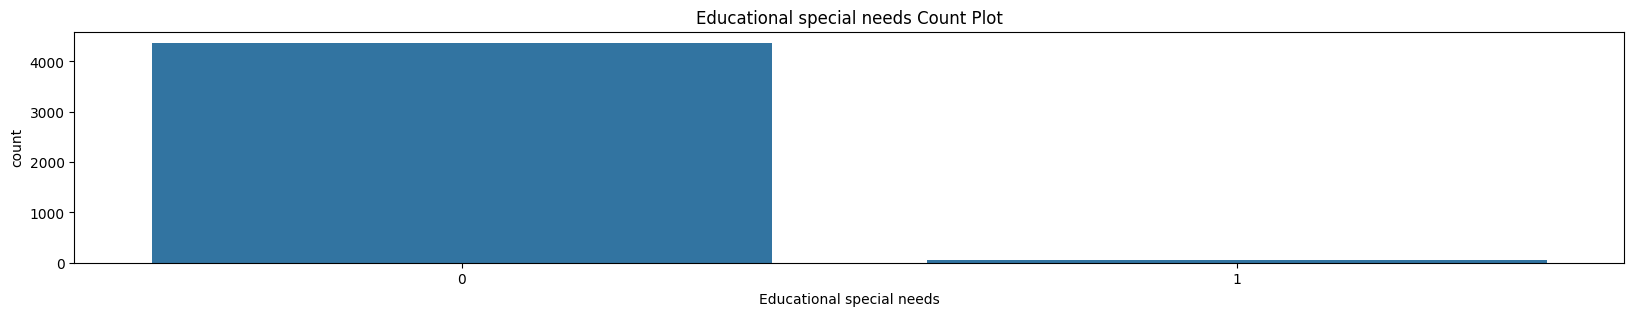

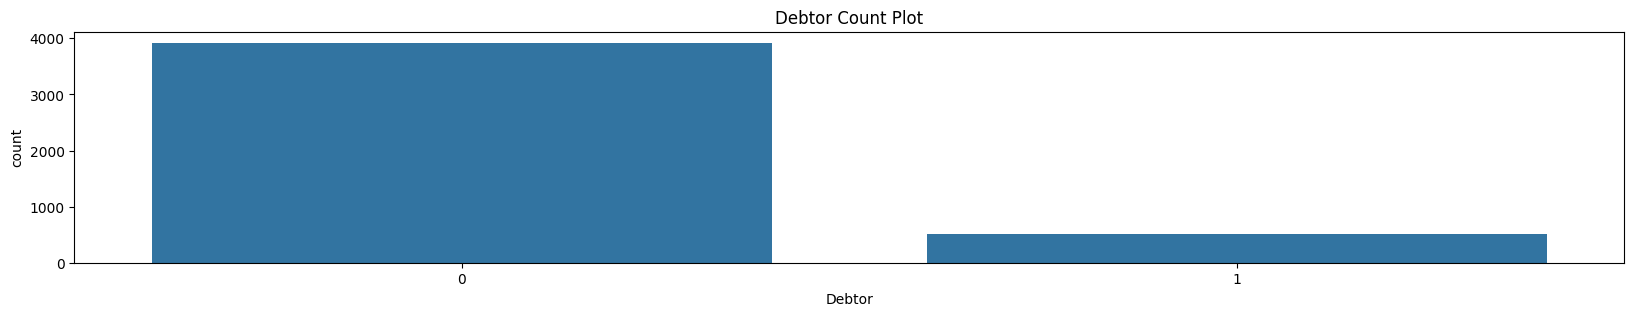

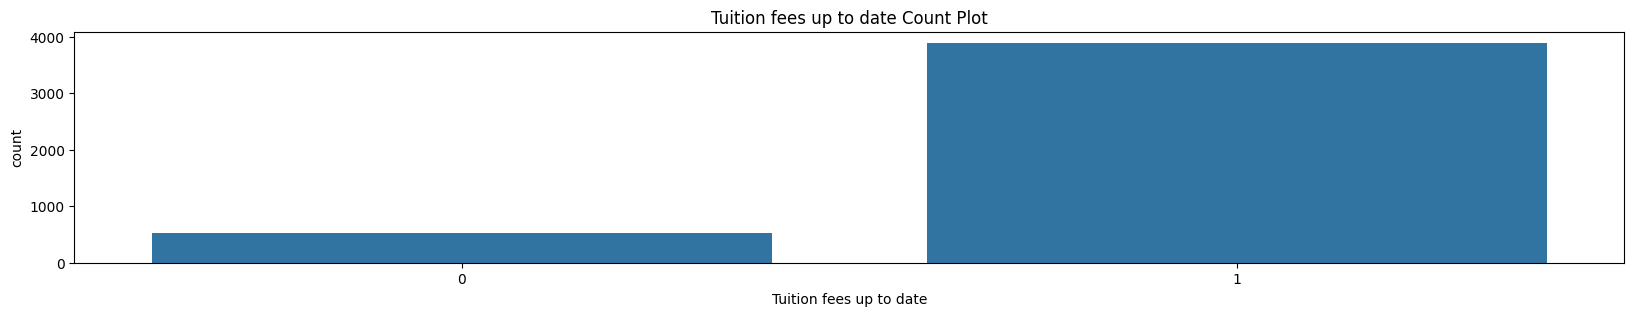

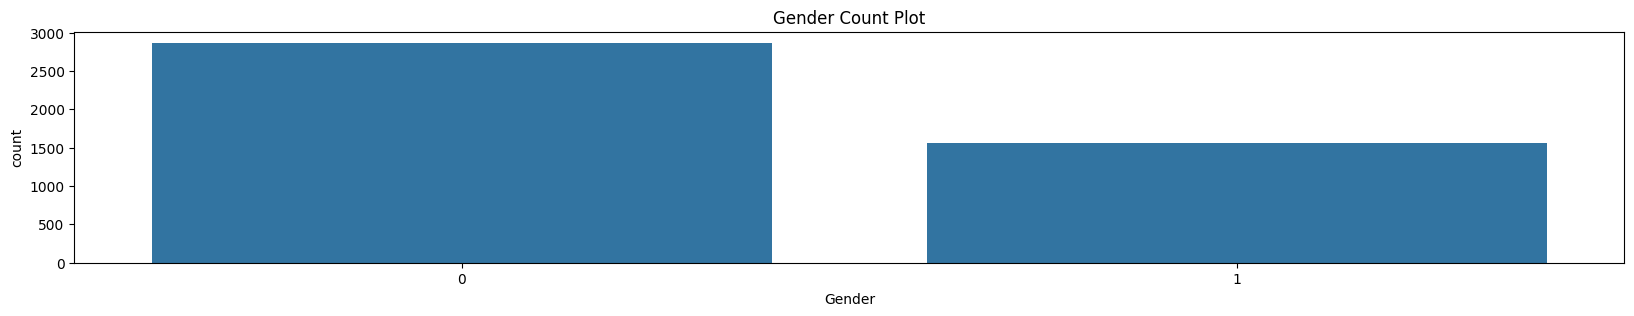

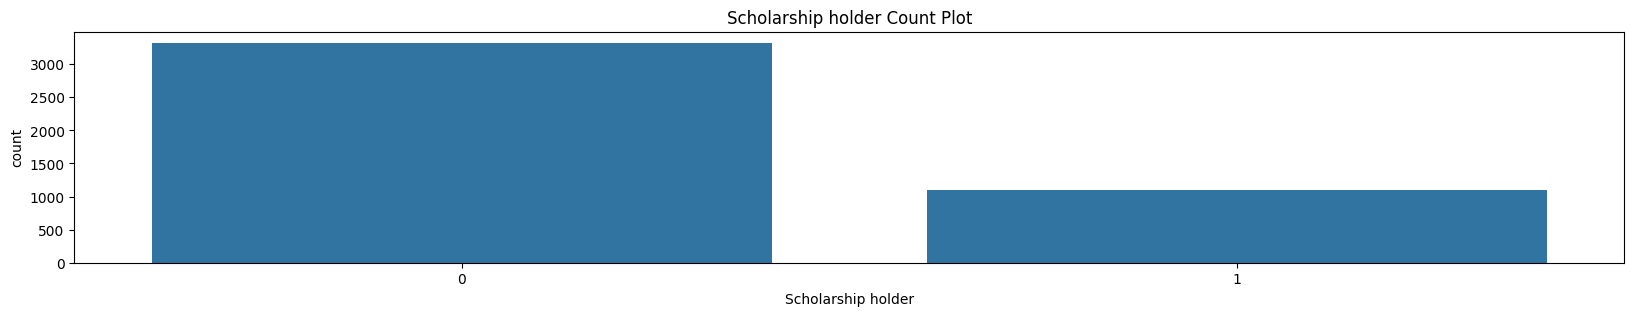

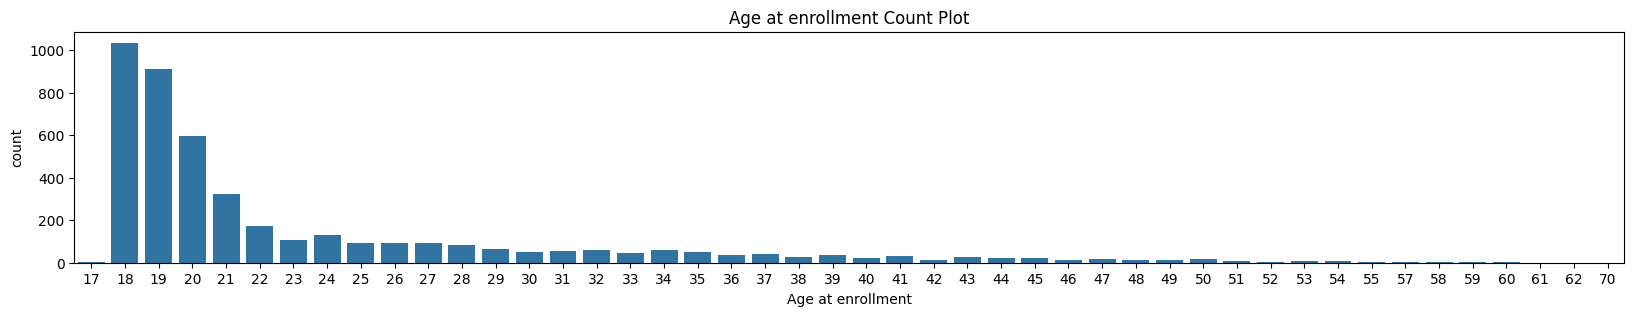

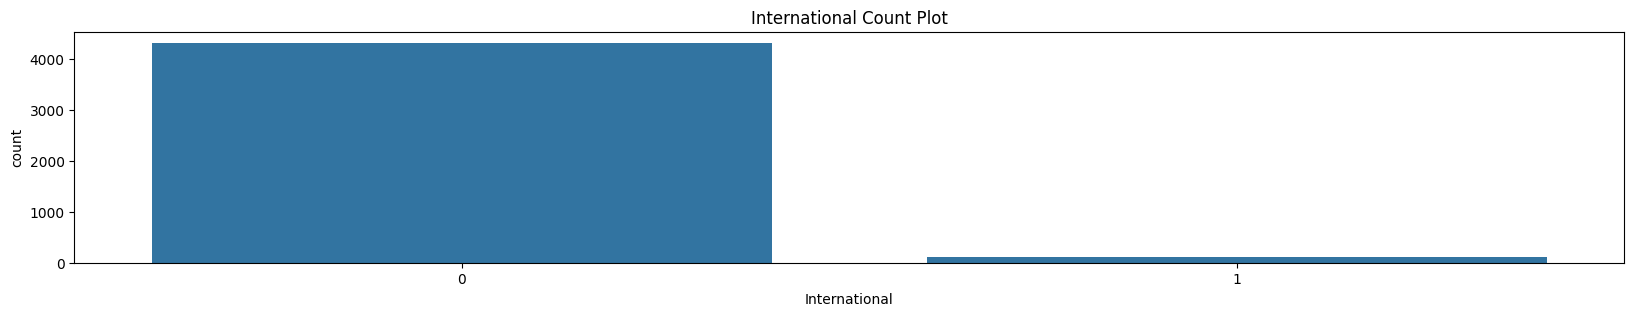

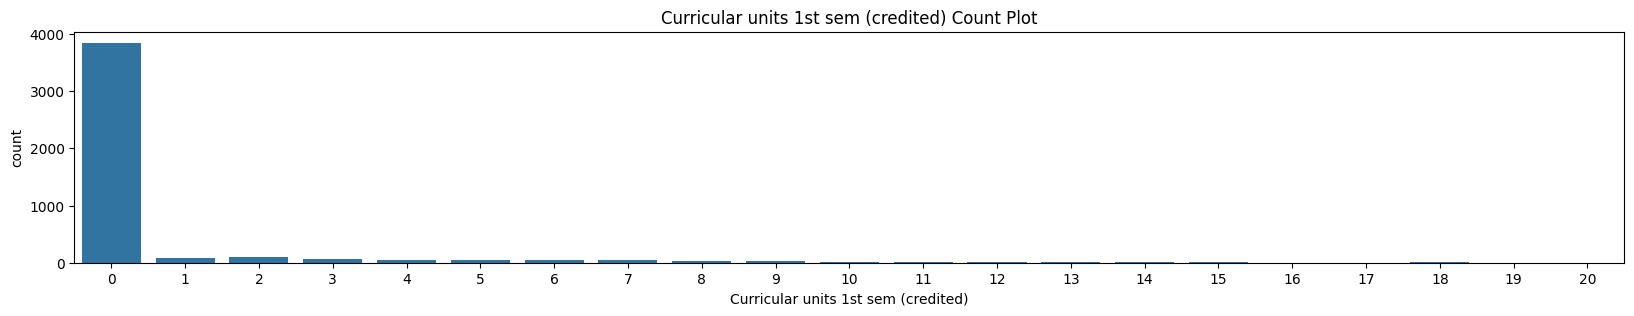

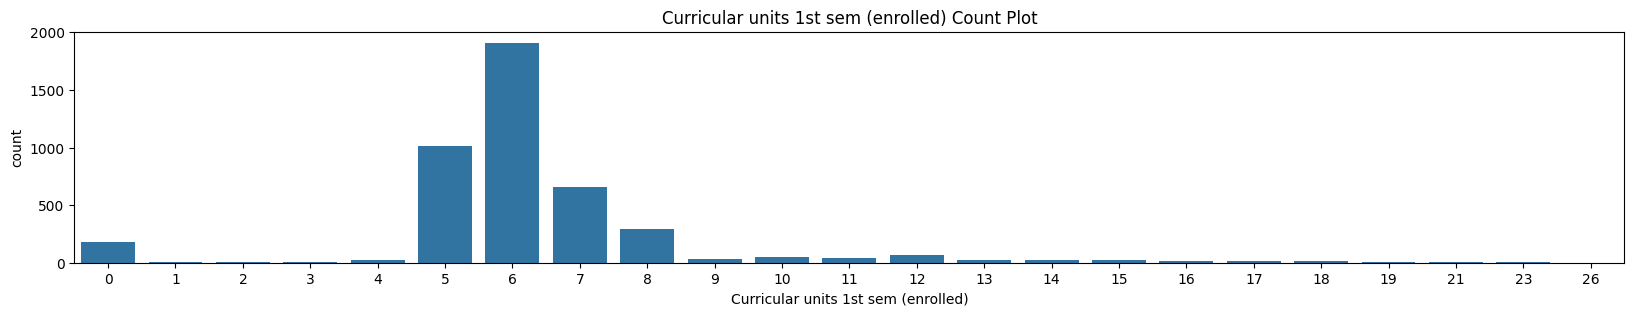

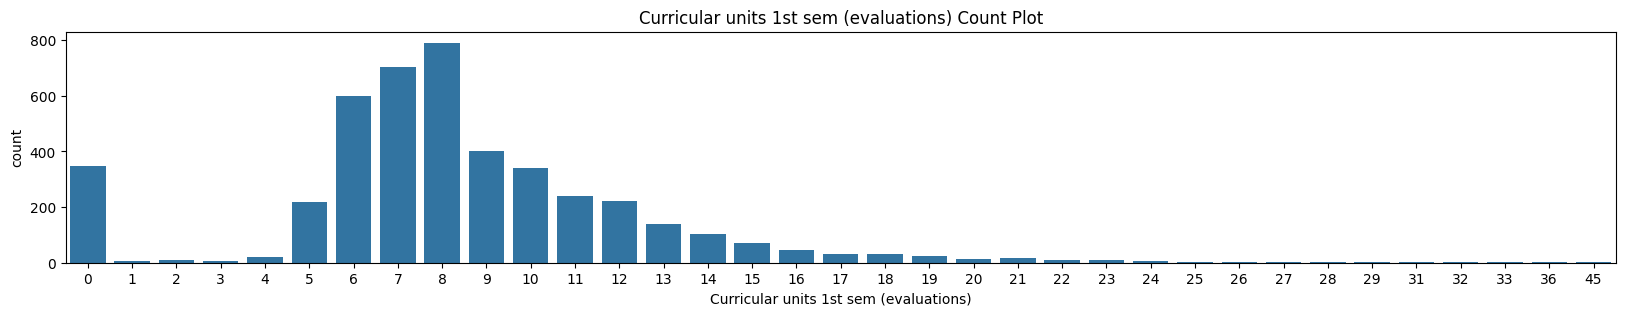

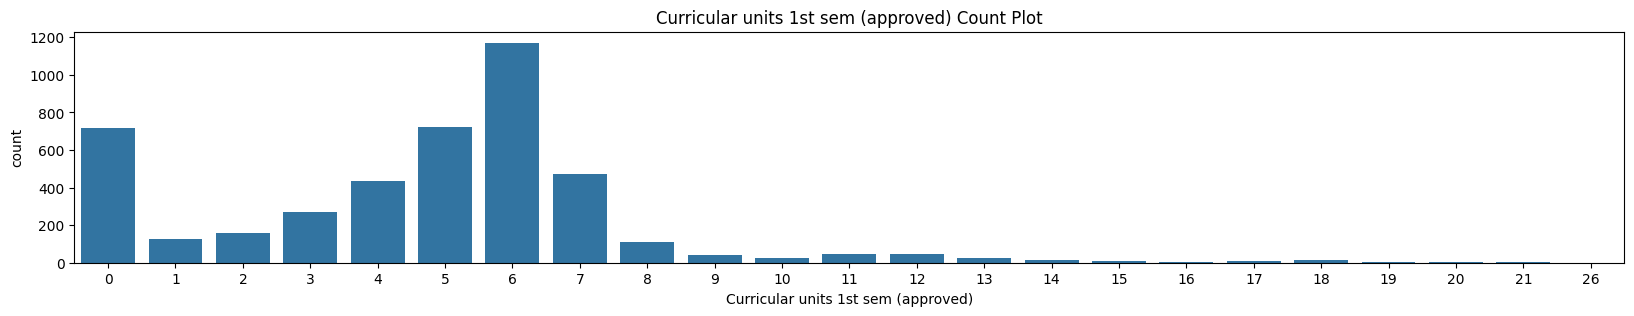

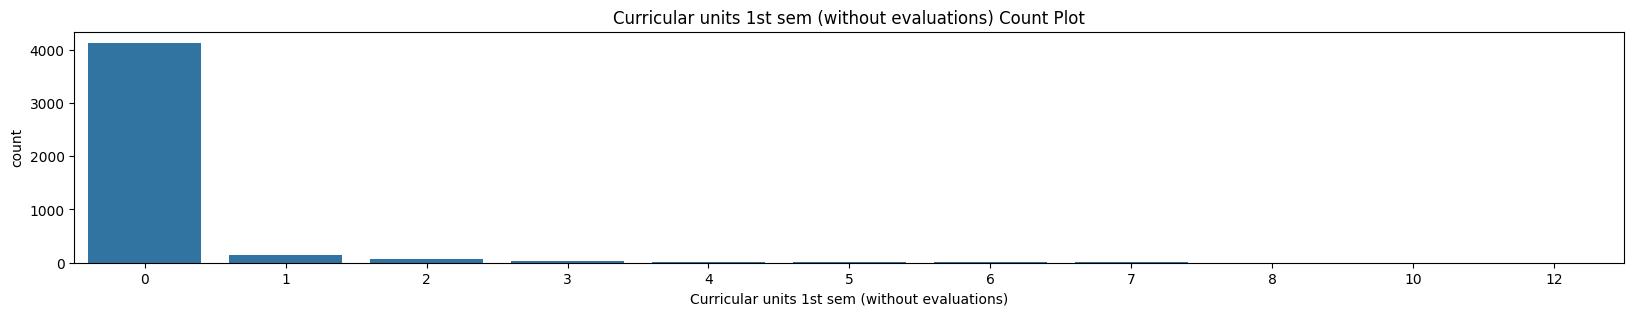

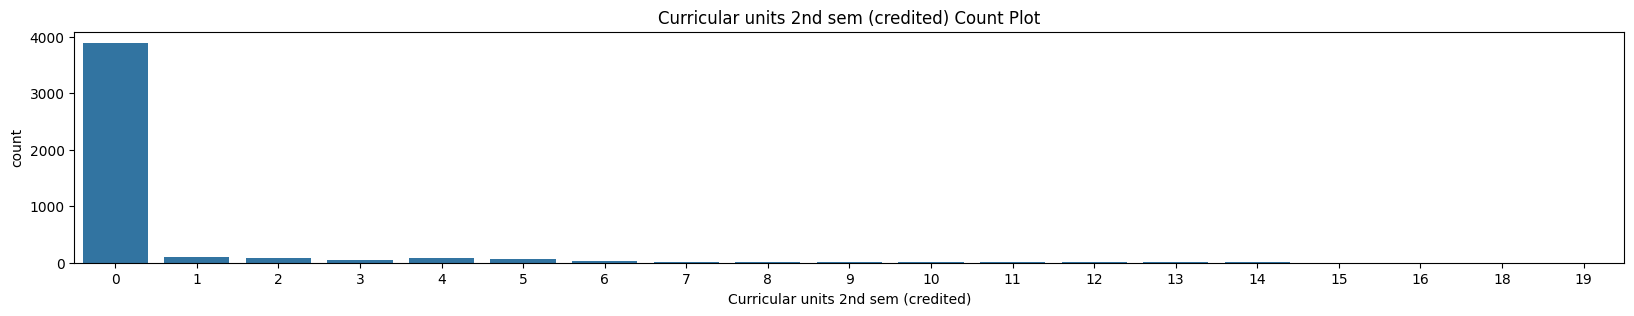

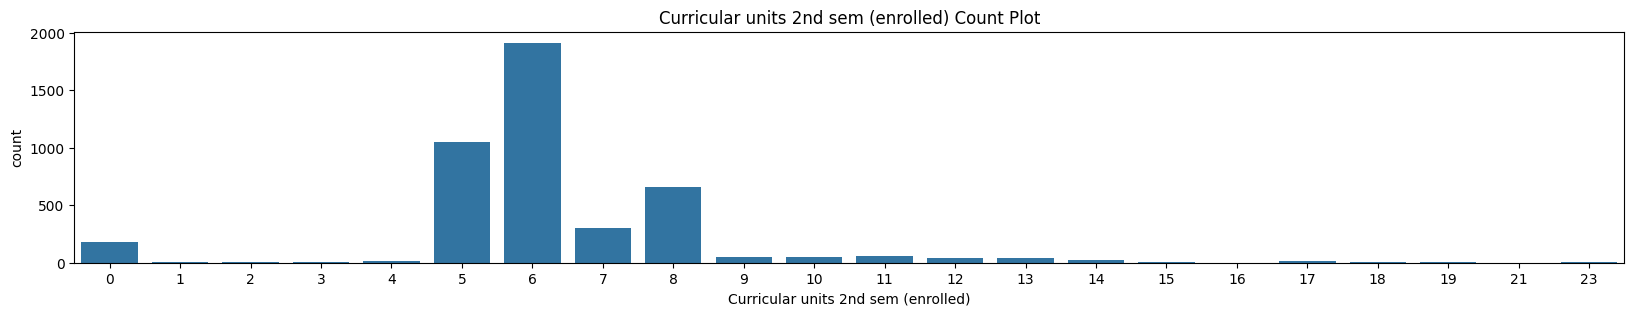

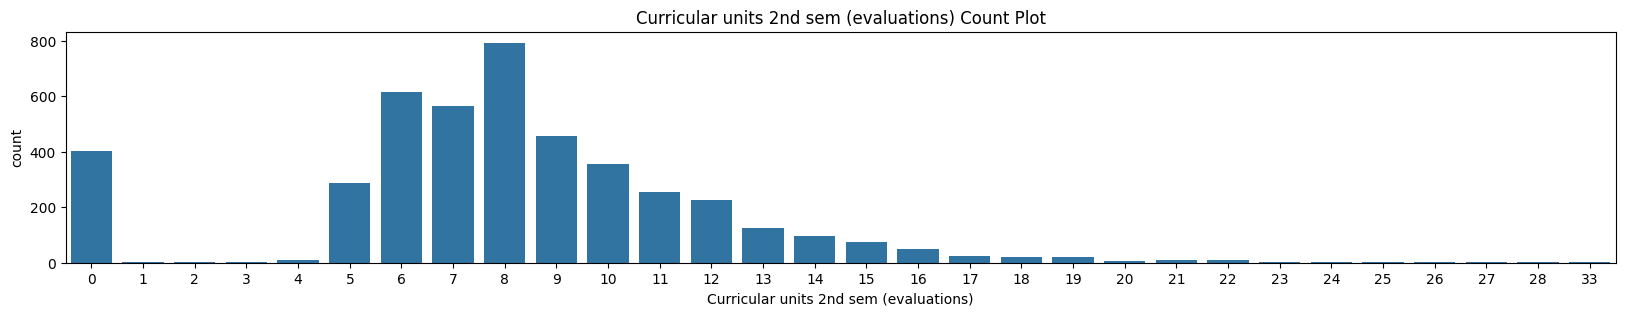

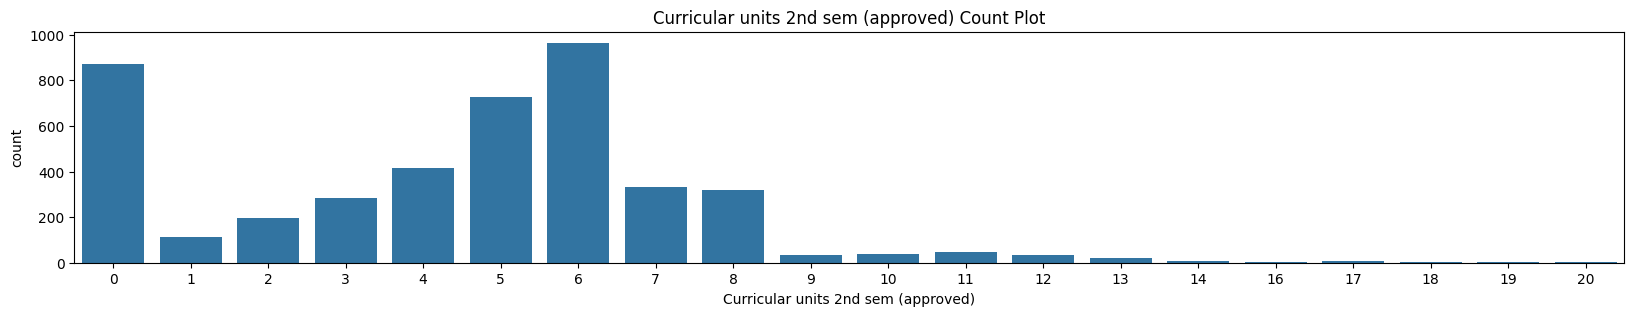

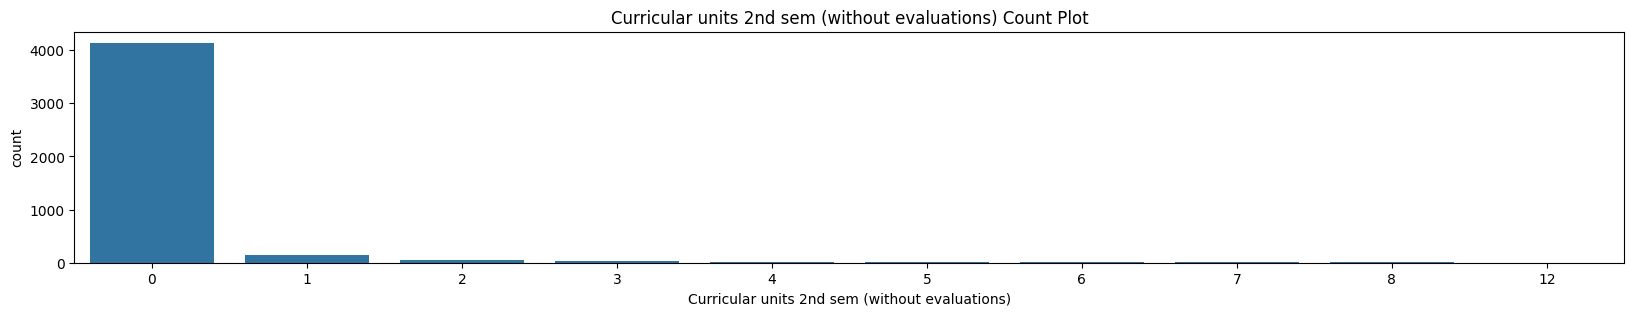

In [12]:
for ind, col in enumerate(categorical_var):
    plt.figure(figsize = (20, 3))
    sns.countplot(x = col, data = df)
    plt.title(f'{col} Count Plot')
    plt.show()

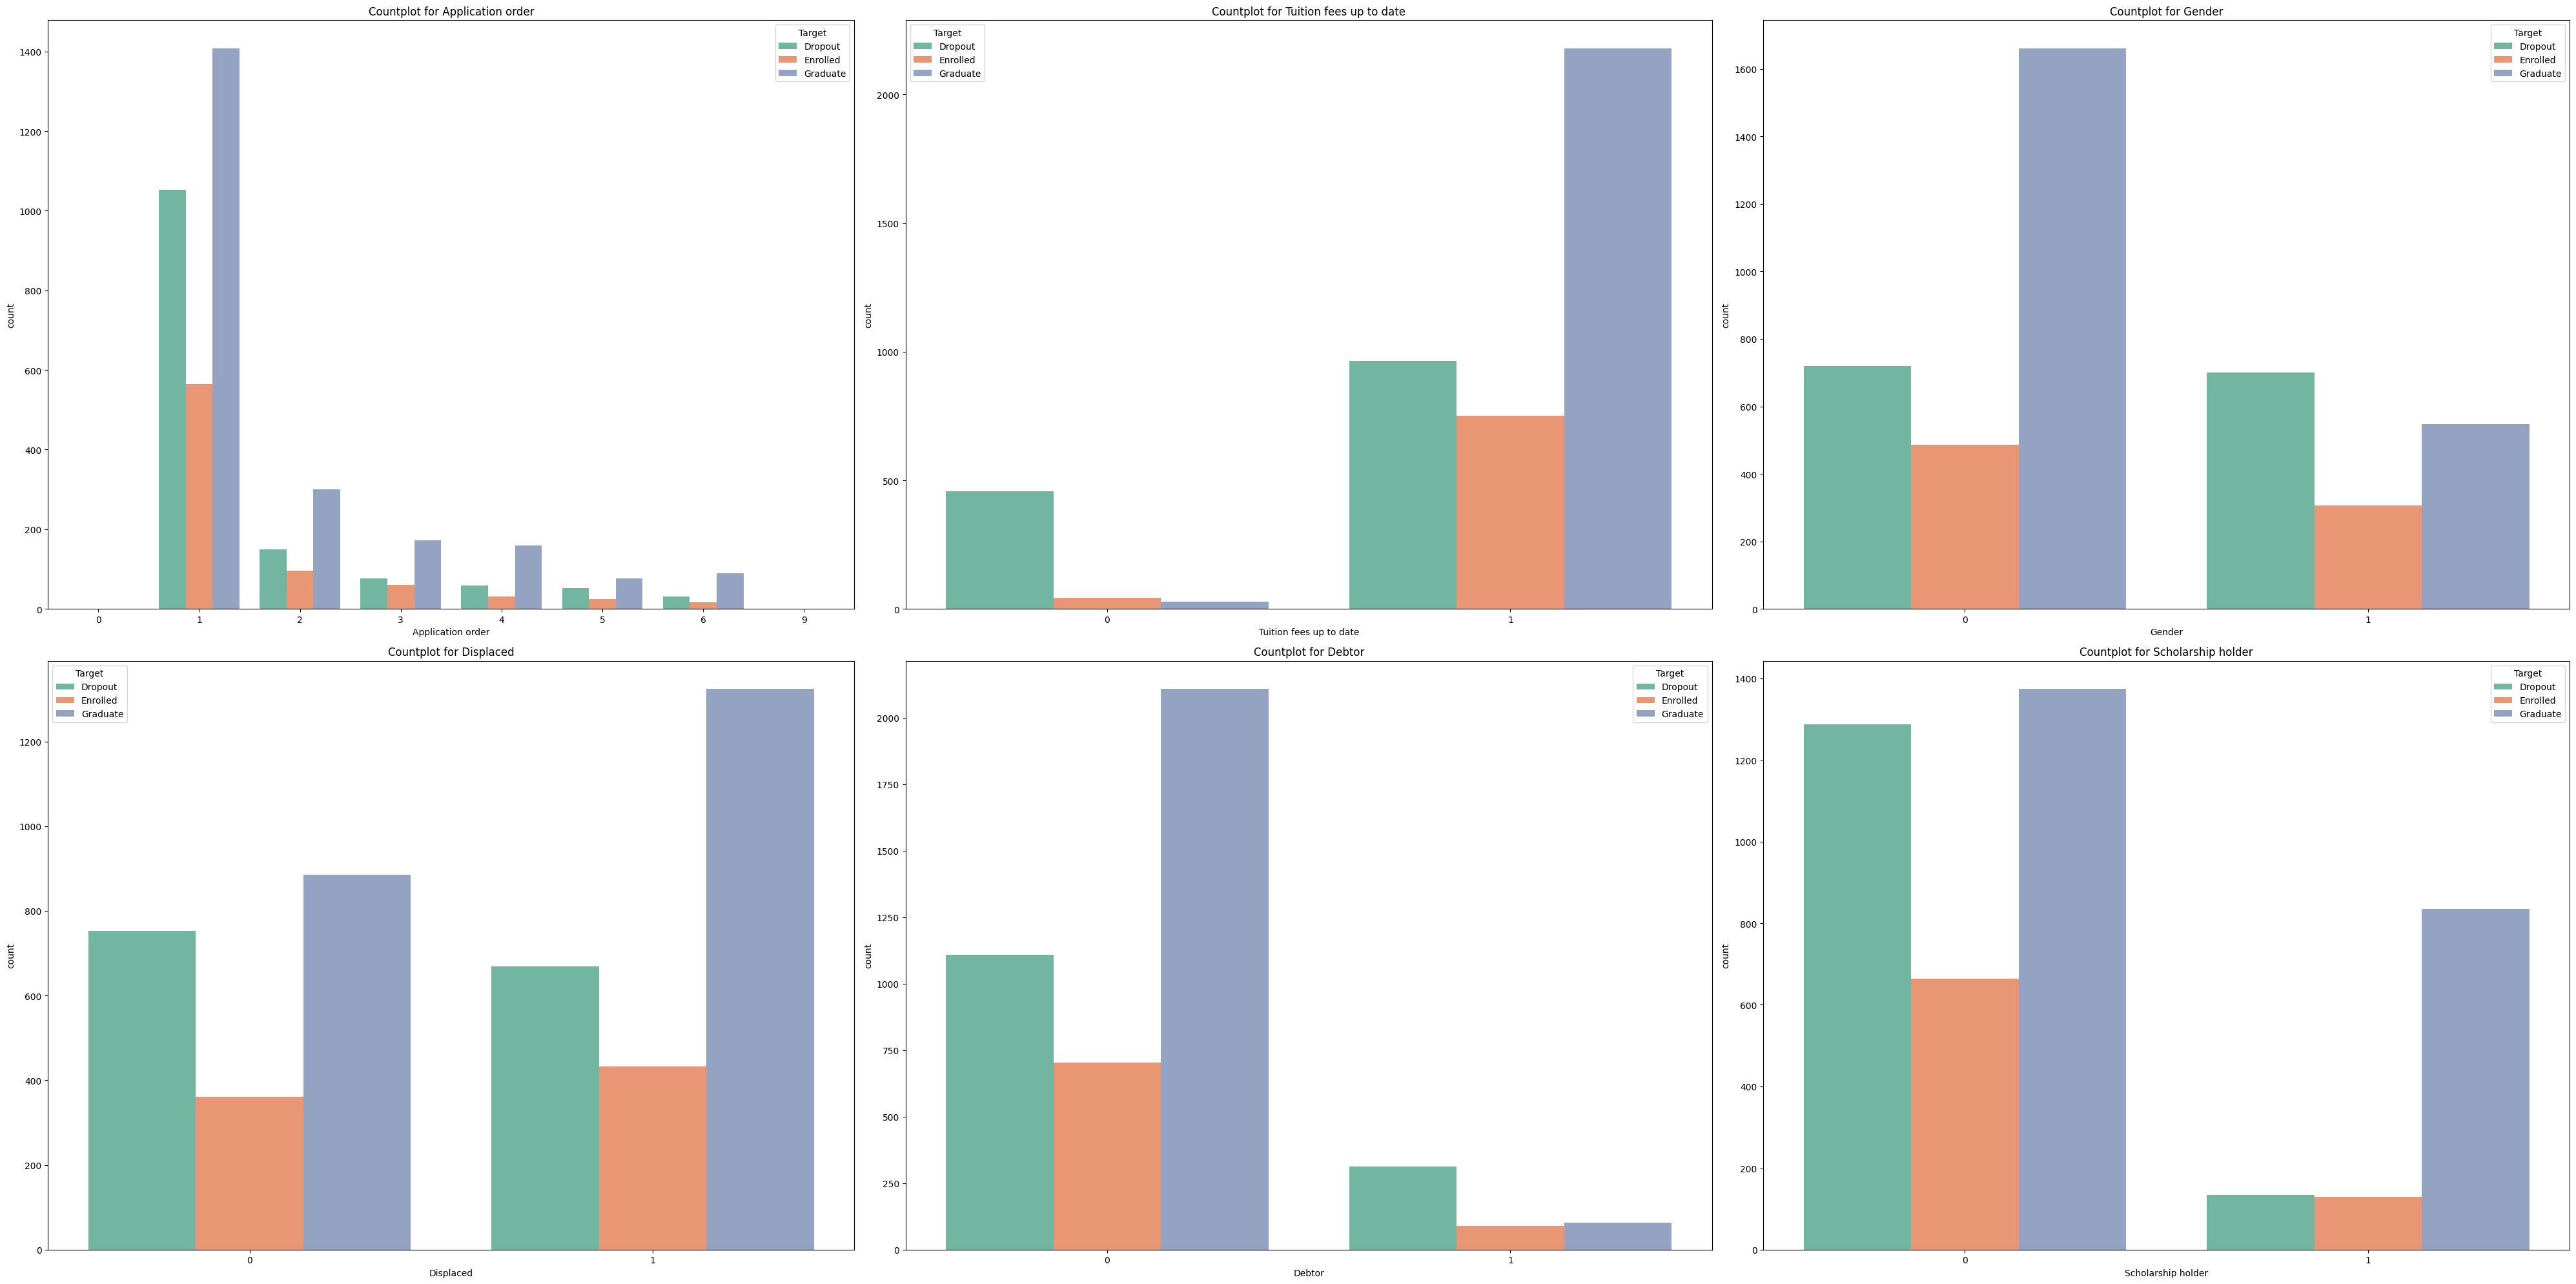

In [13]:
cols = ['Application order', 'Tuition fees up to date', 'Gender', 'Displaced', 'Debtor', 'Scholarship holder']
hue_order = sorted(df['Target'].unique())
fig, axes = plt.subplots(2, 3, figsize = (40, 20))
for i, col in enumerate(cols):
    row = i // 3
    col_idx = i % 3
    sns.countplot(x = col, hue = 'Target', data = df, hue_order = hue_order, ax = axes[row, col_idx], palette = 'Set2')
    axes[row, col_idx].set_title(f'Countplot for {col}')
plt.tight_layout()
plt.show()

### Splitting into Train and Test

In [14]:
df = df.replace({'Target': {'Dropout': 0, 'Graduate': 1, 'Enrolled': 2}})
df['Target'].unique()

array([0, 1, 2], dtype=int64)

In [15]:
cols_to_drop = ['Unemployment rate', 'Inflation rate', 'GDP', 'Target']
# x = df.drop(columns = cols_to_drop, axis = 1)
# y = df['Target']

In [16]:
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [17]:
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

### Scaling the Data

In [18]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_train_scaled

### Correlation Matrix

In [19]:
x = df.drop(columns = ['Target'], axis = 1)
y = df['Target']

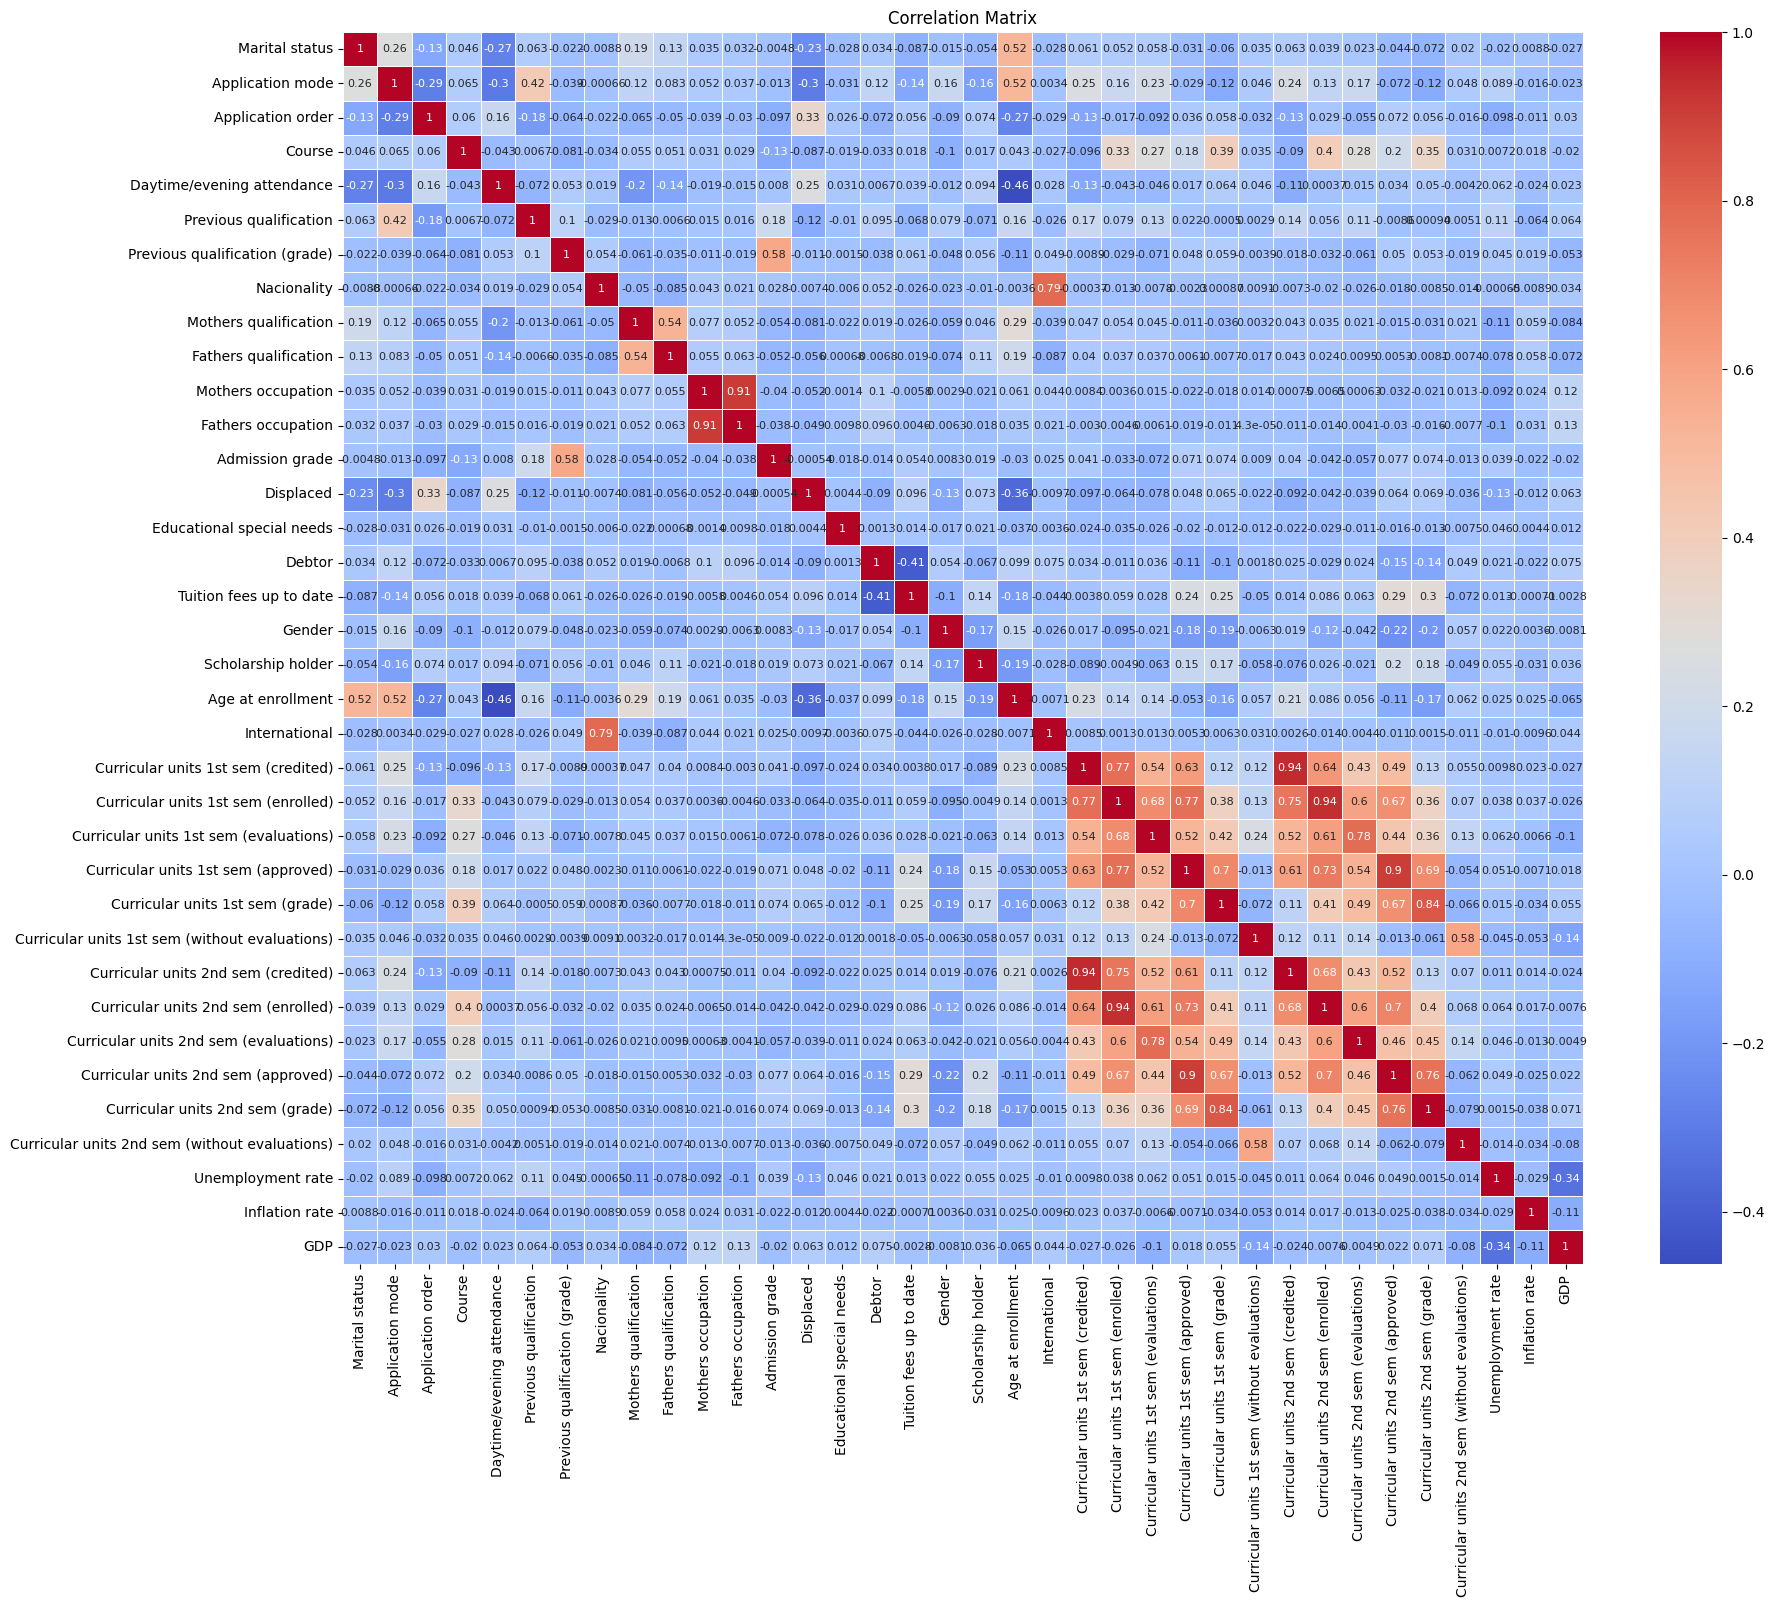

In [20]:
corr_matrix = x.corr()
plt.figure(figsize = (20, 16))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5, annot_kws = {'size': 8})
plt.title('Correlation Matrix')
plt.show()

### Chi-Squared Test

In [21]:
from sklearn.feature_selection import chi2

In [22]:
x = df.drop(columns = cols_to_drop, axis = 1)

In [23]:
chisq_test = chi2(x, y)

In [24]:
p_vals = pd.Series(chisq_test[1], index = x.columns)
p_vals = p_vals.sort_values(ascending = True)
p_vals

Application mode                                   0.000000e+00
Curricular units 2nd sem (approved)                0.000000e+00
Course                                             0.000000e+00
Curricular units 1st sem (grade)                   0.000000e+00
Curricular units 2nd sem (grade)                   0.000000e+00
Curricular units 1st sem (approved)                0.000000e+00
Mothers occupation                                1.047984e-271
Fathers occupation                                3.211879e-225
Age at enrollment                                 3.370198e-156
Curricular units 2nd sem (evaluations)             1.190265e-71
Previous qualification                             6.694055e-70
Mothers qualification                              1.151460e-69
Scholarship holder                                 1.246368e-67
Debtor                                             1.228115e-50
Curricular units 1st sem (evaluations)             1.814394e-34
Curricular units 2nd sem (without evalua

In [26]:
sig = 0.05

no_relation_cols = []

for p in p_vals.index:
    if p_vals[p] > sig:
        no_relation_cols.append(p)
        cols_to_drop.append(p)

print(f'Columns where p-value > 0.05: {no_relation_cols}')
print(f'Columns to drop: {cols_to_drop}')

Columns where p-value > 0.05: ['Daytime/evening attendance', 'International', 'Educational special needs']
Columns to drop: ['Unemployment rate', 'Inflation rate', 'GDP', 'Target', 'Daytime/evening attendance', 'International', 'Educational special needs']


In [28]:
cols_high_corr = ['Mothers occupation', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (credited)']

In [29]:
for col in cols_high_corr:
    cols_to_drop.append(col)

In [30]:
cols_to_drop

['Unemployment rate',
 'Inflation rate',
 'GDP',
 'Target',
 'Daytime/evening attendance',
 'International',
 'Educational special needs',
 'Mothers occupation',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (credited)']

In [31]:
x = df.drop(columns = cols_to_drop, axis = 1)
y = df['Target']

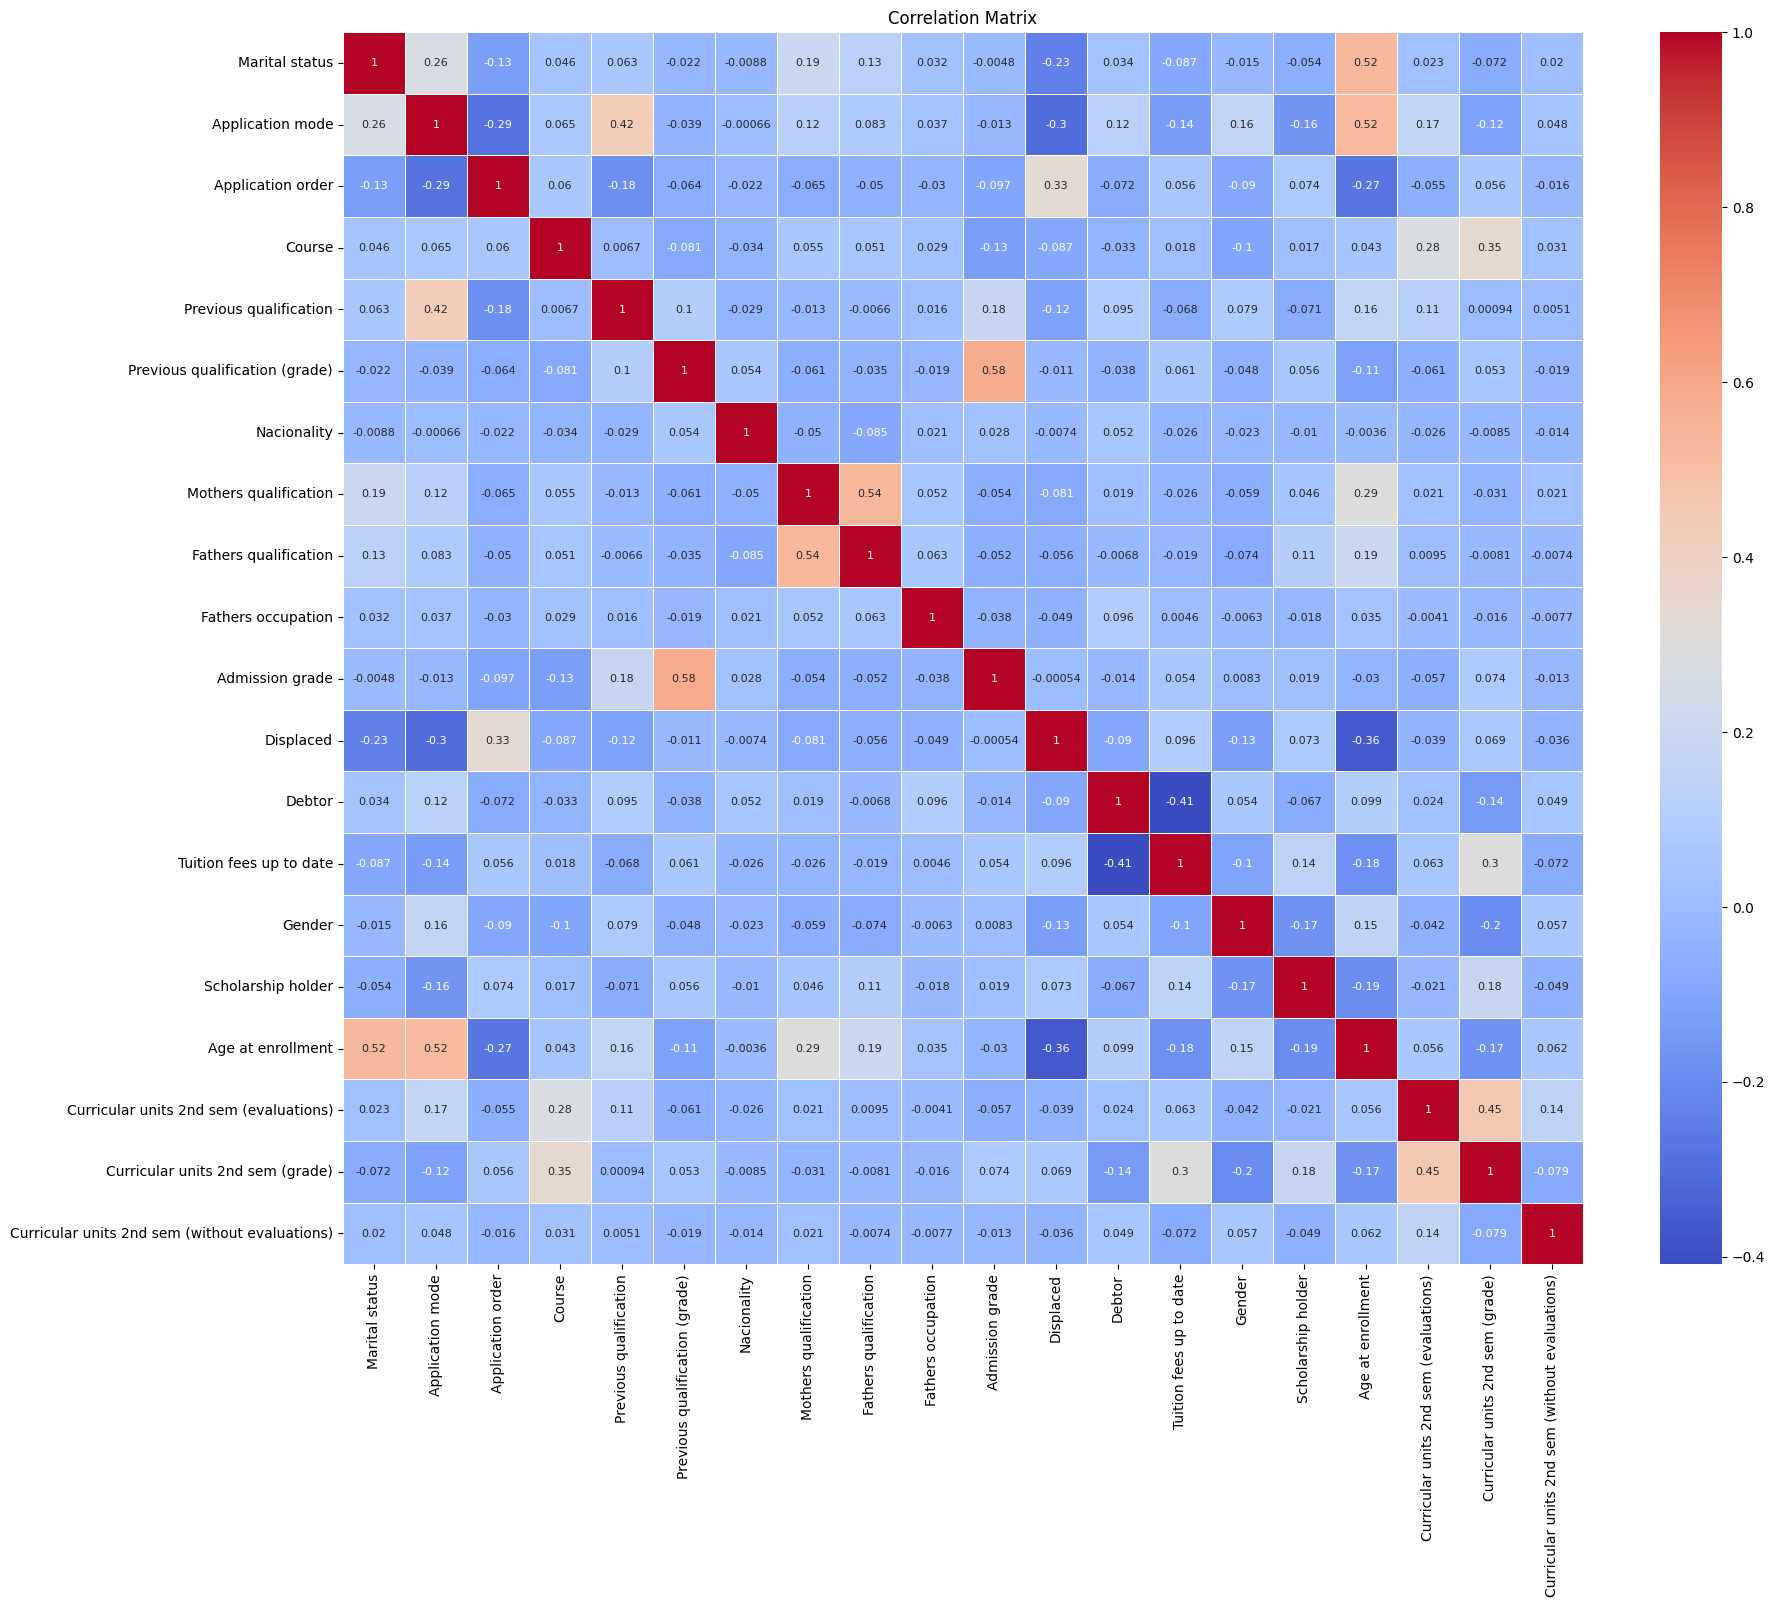

In [32]:
corr_matrix = x.corr()
plt.figure(figsize = (20, 16))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5, annot_kws = {'size': 8})
plt.title('Correlation Matrix')
plt.show()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100, stratify = y)

In [34]:
X_train.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Previous qualification', 'Previous qualification (grade)',
       'Nacionality', 'Mothers qualification', 'Fathers qualification',
       'Fathers occupation', 'Admission grade', 'Displaced', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)'],
      dtype='object')

### Decision Trees

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
tree = DecisionTreeClassifier(random_state = 100)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [37]:
tree_pred = tree.predict(X_test)
tree_acc = accuracy_score(y_test, tree_pred)
tree_acc

0.6167168674698795

In [38]:
tree_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [39]:
y_test

3770    0
3310    1
588     1
6       1
4277    0
       ..
1557    2
3938    1
1490    1
3050    0
2457    2
Name: Target, Length: 1328, dtype: int64

In [40]:
def model_eval(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average = 'macro')
    recall = recall_score(y_true, y_pred, average = 'macro')
    f1 = f1_score(y_true, y_pred, average = 'macro')
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

In [41]:
model_eval(y_test, tree_pred)

Accuracy: 0.6167
Precision: 0.5540
Recall: 0.5514
F1 Score: 0.5525

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.63      0.65       427
           1       0.72      0.72      0.72       663
           2       0.28      0.30      0.29       238

    accuracy                           0.62      1328
   macro avg       0.55      0.55      0.55      1328
weighted avg       0.62      0.62      0.62      1328



In [42]:
def conf_matrix_vis(y_true, y_pred, model_name='Model'):
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))  # Set figure size for better visibility
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)

    # Add titles and labels
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    # Set ticks for clarity
    plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['0', '1', '2'], rotation=0)
    plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['0', '1', '2'], rotation=0)
    
    # Show the plot
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

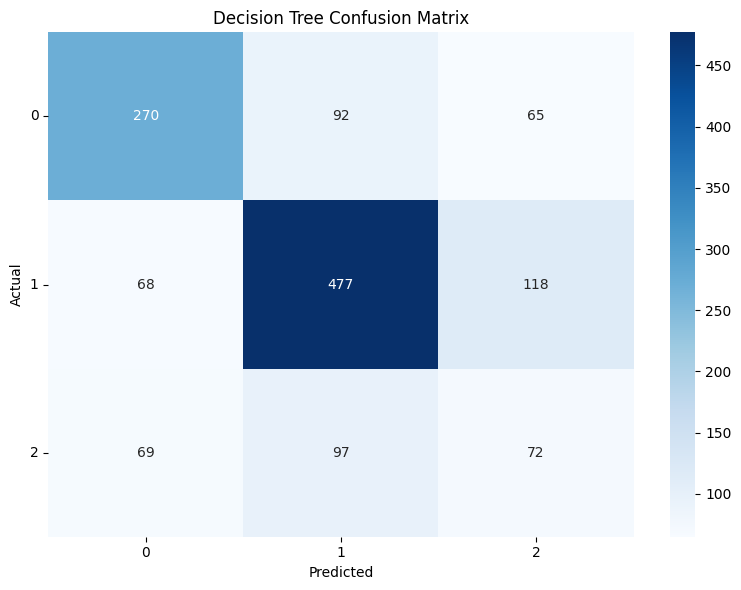

In [43]:
conf_matrix_vis(y_test, tree_pred, 'Decision Tree')

#### Decision Tree Hyperparameter Tuning

In [45]:
dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=100),
    param_grid = dt_param_grid,
    cv=5,
    n_jobs=-1,
    verbose = 1
)
dt_grid.fit(X_train, y_train)

# Best parameters
print(f'Decision Trees Best Parameters: {dt_grid.best_params_}')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Decision Trees Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [46]:
dt_best = dt_grid.best_estimator_
dt_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=100)

In [47]:
y_pred_dt = dt_best.predict(X_test)

In [48]:
model_eval(y_test, y_pred_dt)

Accuracy: 0.6845
Precision: 0.6206
Recall: 0.5717
F1 Score: 0.5774

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.62      0.70       427
           1       0.68      0.90      0.78       663
           2       0.37      0.19      0.25       238

    accuracy                           0.68      1328
   macro avg       0.62      0.57      0.58      1328
weighted avg       0.67      0.68      0.66      1328



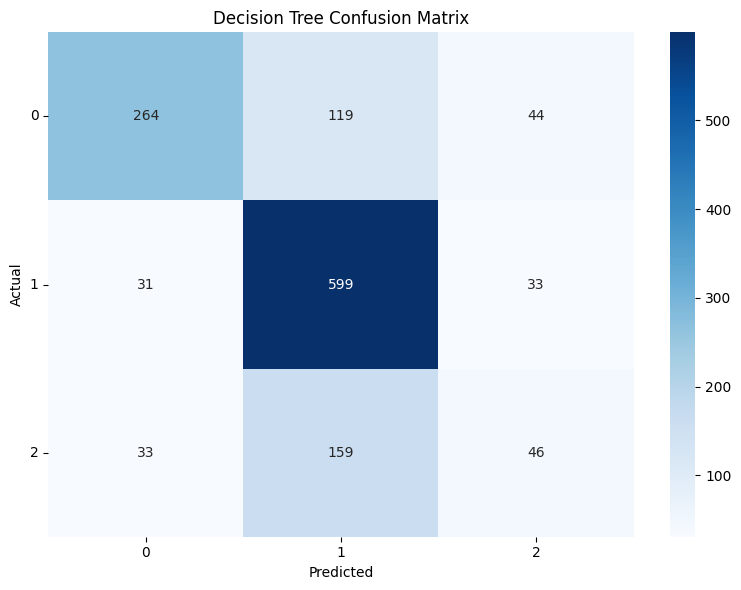

In [49]:
conf_matrix_vis(y_test, y_pred_dt, 'Decision Tree')

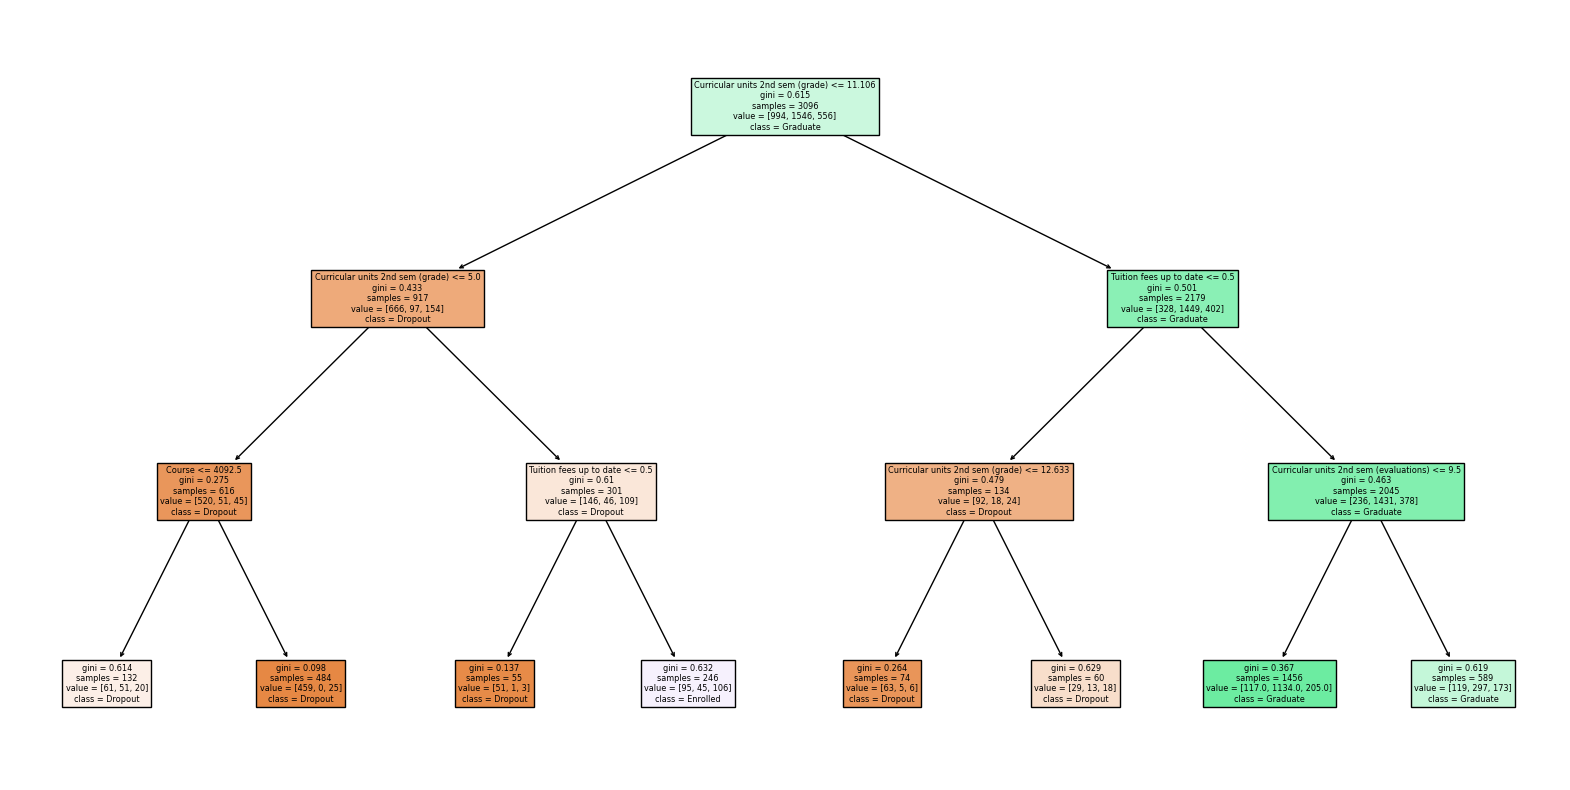

In [67]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the Decision Tree directly
plt.figure(figsize=(20, 10))
plot_tree(dt_best, feature_names=X_train.columns, class_names=['Dropout', 'Graduate', 'Enrolled'], filled=True)
plt.show()

### Random Forest Classifier

In [50]:
rf = RandomForestClassifier(random_state = 100)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

#### Testing

In [51]:
rf_pred = rf.predict(X_test)

In [52]:
model_eval(y_test, rf_pred)

Accuracy: 0.7078
Precision: 0.6197
Recall: 0.5866
F1 Score: 0.5790

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       427
           1       0.72      0.91      0.80       663
           2       0.39      0.13      0.20       238

    accuracy                           0.71      1328
   macro avg       0.62      0.59      0.58      1328
weighted avg       0.67      0.71      0.67      1328



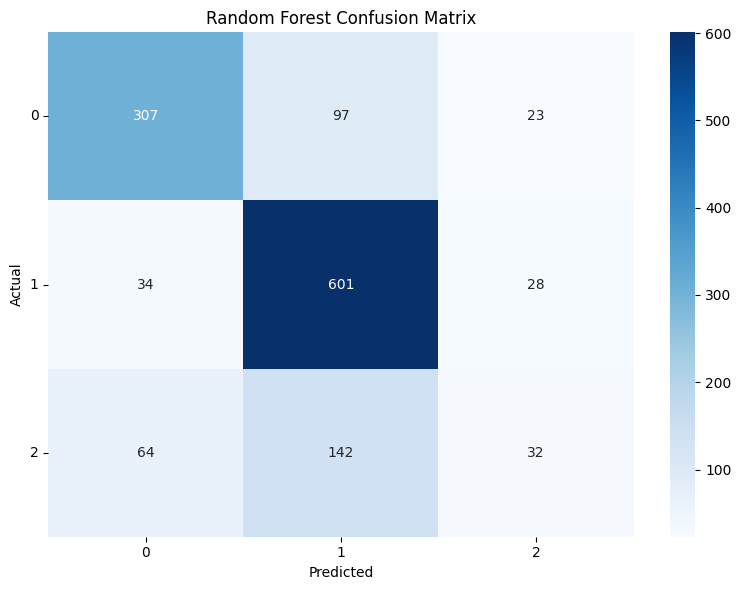

In [53]:
conf_matrix_vis(y_test, rf_pred, 'Random Forest')

#### Random Forest Hyperparameter Tuning

In [54]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state = 100),
    param_grid = rf_param_grid,
    cv = 3,
    n_jobs=-1,
    verbose= 1)
rf_grid.fit(X_train, y_train)

print(f'Random Forest Best Parameters: {rf_grid.best_params_}')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Random Forest Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


In [55]:
rf_best = rf_grid.best_estimator_
rf_best.fit(X_train, y_train)
y_pred_rf = rf_best.predict(X_test)

In [56]:
model_eval(y_test, y_pred_rf)

Accuracy: 0.7131
Precision: 0.6434
Recall: 0.5974
F1 Score: 0.5968

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.71      0.75       427
           1       0.71      0.91      0.80       663
           2       0.44      0.17      0.25       238

    accuracy                           0.71      1328
   macro avg       0.64      0.60      0.60      1328
weighted avg       0.69      0.71      0.68      1328



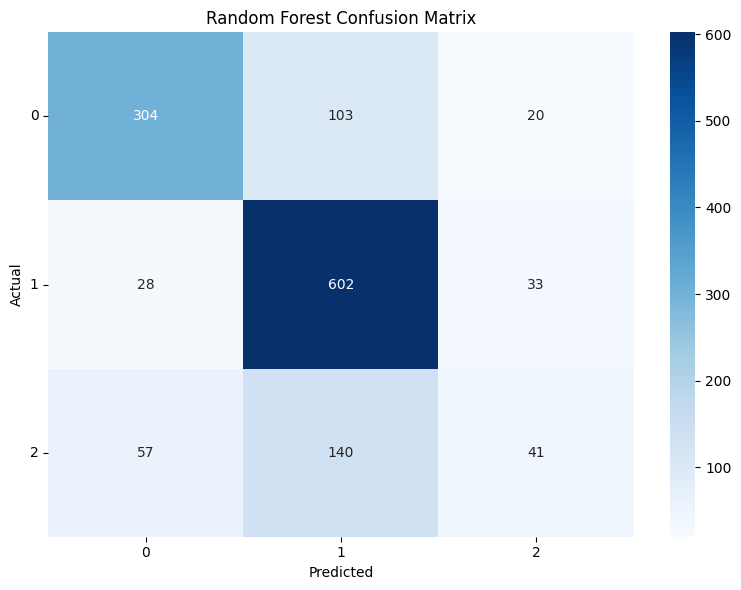

In [57]:
conf_matrix_vis(y_test, y_pred_rf, 'Random Forest')

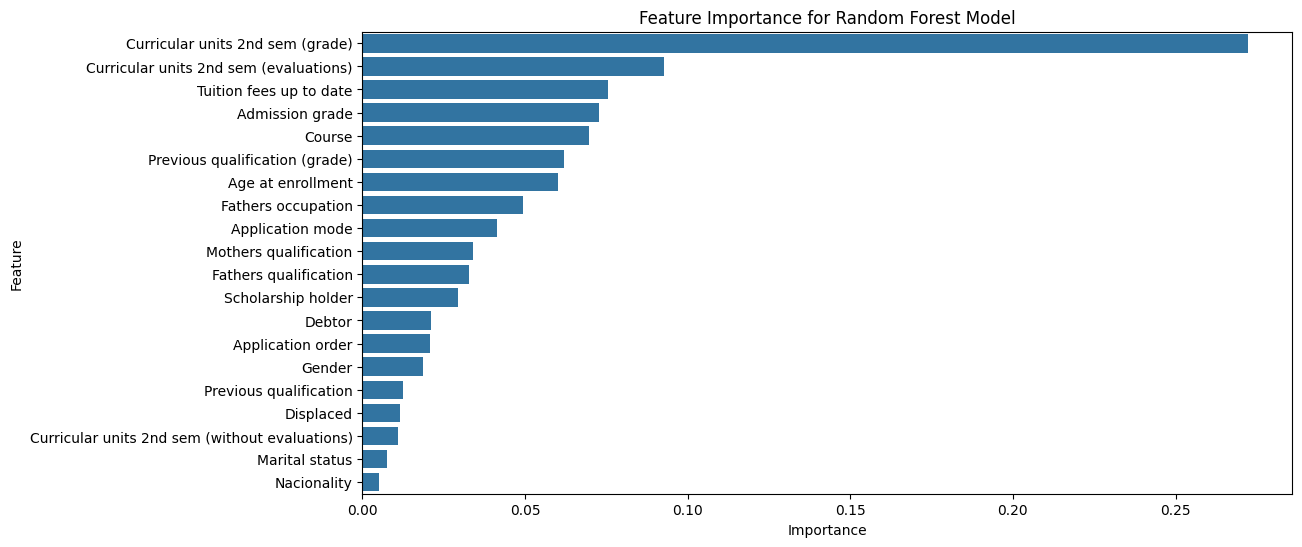

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'rf_model' is your Random Forest model and 'X_train' is your feature set
feature_importances = rf_best.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Random Forest Model')
plt.show()

Model Performance Metrics
Accuracy:

Random Forest: 0.7575 (approximately 75.75%)
Initial Model: 0.6852 (approximately 68.52%)
Interpretation: The random forest model has a higher accuracy, indicating that it correctly predicts the class labels for a larger portion of the test set. While this is a positive sign, accuracy can be misleading in cases of imbalanced classes.
Precision:

Random Forest: 0.7023 (70.23%)
Initial Model: 0.6245 (62.45%)
Interpretation: Precision measures the accuracy of positive predictions. In this context, higher precision in the RF model suggests that when it predicts a student will graduate (1) or remain enrolled (2), it is more likely to be correct.
Recall:

Random Forest: 0.6637 (66.37%)
Initial Model: 0.6222 (62.22%)
Interpretation: Recall measures the ability to identify all relevant cases. The RF model demonstrates better recall, which is especially important in educational settings where identifying at-risk students (dropouts) is critical.
F1 Score:

Random Forest: 0.6732 (67.32%)
Initial Model: 0.6232 (62.32%)
Interpretation: The F1 score balances precision and recall. The RF model's higher F1 score indicates a more reliable performance across classes, suggesting a better trade-off between identifying graduates/enrolled students and minimizing false positives.
Class-Specific Metrics
Class 0 (Dropout):

The RF model's performance should ideally focus on minimizing false negatives here, as accurately predicting students at risk of dropping out is crucial. Your results show that while the RF may classify some students correctly, enhancing its performance on this class remains vital.
Class 1 (Graduate):

The RF model achieves a precision of 0.78 and recall of 0.93, indicating it identifies graduating students effectively while minimizing misclassifications. This strong performance is important for ensuring that resources are allocated appropriately for students who are likely to graduate.
Class 2 (Enrolled):

The RF model has a precision of 0.52 and recall of 0.33 for this class. While it identifies some students who remain enrolled, it misclassifies a significant portion. Improving prediction accuracy for this group is essential to support students who may be struggling but not at immediate risk of dropping out.
Relevance in the Field of Education
Risk Identification: Accurately identifying students likely to drop out (Class 0) is critical for educational institutions. While the RF model has improved overall metrics, there is still room for improvement in predicting this group to ensure timely interventions.

Resource Allocation: Understanding which students are likely to graduate (Class 1) or remain enrolled (Class 2) enables educational institutions to allocate resources more effectively, providing support where it is most needed.

Intervention Strategies: By leveraging the insights gained from classification, educators can implement targeted intervention strategies tailored to each class, such as personalized counseling for at-risk students or programs to support those who are struggling but not yet in danger of dropping out.

Recommendations for Further Improvement
Hyperparameter Tuning: Utilize hyperparameter tuning techniques (e.g., GridSearchCV or RandomizedSearchCV) to optimize your random forest model for better performance across all classes.

Feature Engineering: Evaluate the existing features and consider adding or transforming them to improve predictive performance, especially for Class 0 (dropouts) and Class 2 (enrolled).

Class Imbalance Handling: Apply methods like SMOTE (Synthetic Minority Over-sampling Technique) or adjust class weights in your model to better handle the class imbalance, particularly for Class 0 and Class 2.

Model Ensemble: Experiment with combining predictions from multiple models (e.g., Random Forest, Gradient Boosting, or logistic regression) to enhance overall predictive performance.

Cross-validation: Implement k-fold cross-validation to ensure the robustness of your model across different subsets of data, confirming its ability to generalize well.

By addressing these areas for improvement, you can enhance the predictive capabilities of your model, leading to more reliable outcomes that are essential for educational success and student retention.